## Importing necessary packages for the project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()  # for plot styling%matplotlib inline
import random
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#import models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

#import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the datasets

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
#Creating User Columns
df_user = pd.DataFrame(np.arange(0,len(df)), columns=['custnum'])
df = pd.concat([df_user, df], axis=1)

## Data Exploration

In [4]:
df.shape

(45211, 18)

In [5]:
df.head()

,custnum,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.describe()

,custnum,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   custnum    45211 non-null  int32 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


In [8]:
df.isnull().sum().any()

False

In [9]:
df.drop_duplicates()

,custnum,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Analysis

In [10]:
df.corr()

,custnum,age,balance,day,duration,campaign,pdays,previous
custnum,1.000000,0.014973,0.073639,-0.061465,0.013031,-0.102884,0.437729,0.271098
age,0.014973,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.073639,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.061465,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,0.013031,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,-0.102884,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,0.437729,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.271098,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [11]:
df.groupby('y').mean()

,custnum,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [12]:
countNo = len(df[df.y == 'no'])
countYes = len(df[df.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


## Feature Selection

In [13]:
#Define X and y
X = df.drop(['y','custnum','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

In [14]:
X

,age,default,balance,duration,campaign,pdays,previous
0,58,no,2143,261,1,-1,0
1,44,no,29,151,1,-1,0
2,33,no,2,76,1,-1,0
3,47,no,1506,92,1,-1,0
4,33,no,1,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,no,825,977,3,-1,0
45207,71,no,1729,456,2,-1,0
45208,72,no,5715,1127,5,184,3
45209,57,no,668,508,4,-1,0


In [15]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [16]:
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

<AxesSubplot:xlabel='y', ylabel='count'>

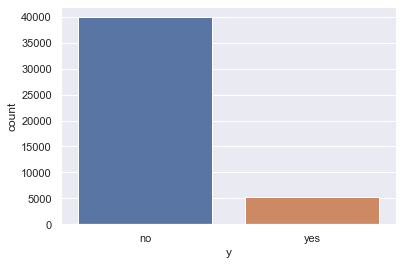

In [17]:
sns.countplot(x='y', data=df, label='Count')

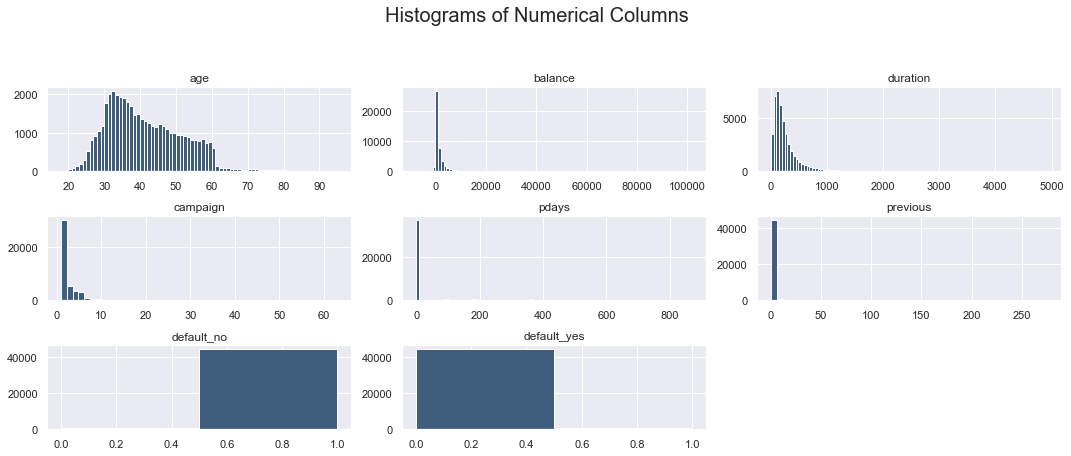

In [18]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(X.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(X.columns.values[i])

    vals = np.size(X.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(X.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:title={'center':'Correlation with Y'}>

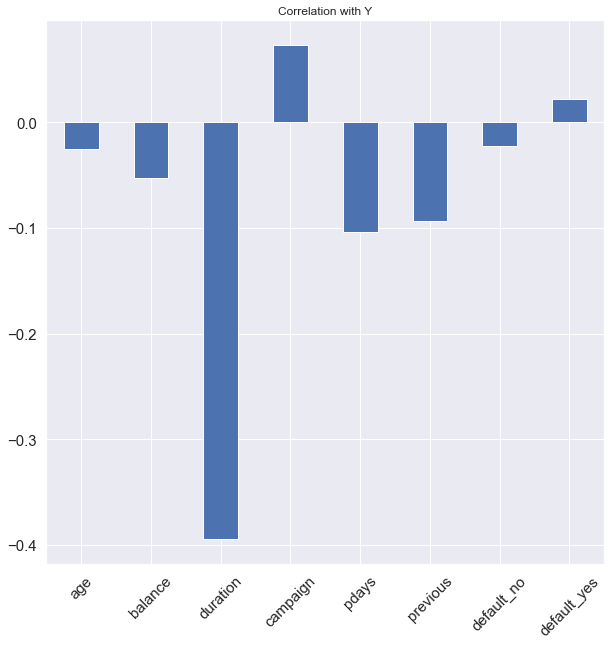

In [19]:
## Correlation with independent Variable 
X.corrwith(y.y).plot.bar(
        figsize = (10, 10), title = "Correlation with Y", fontsize = 15,
        rot = 45, grid = True)

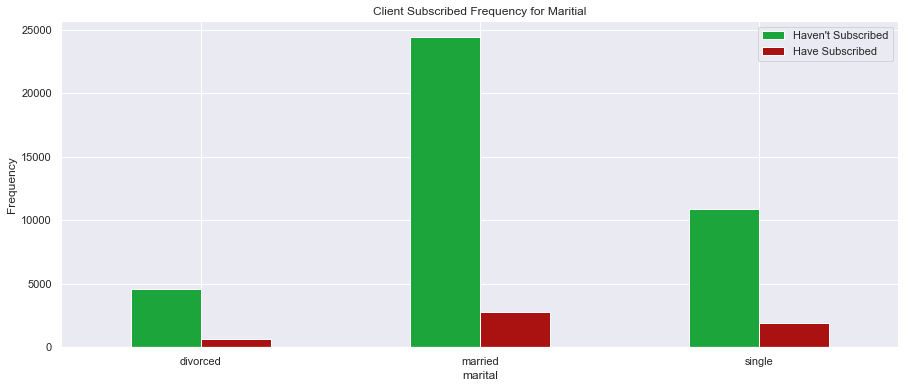

In [20]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

## Splitting the Dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [22]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 8) (9043, 8) (36168, 1) (9043, 1)


## Balancing the Data

In [23]:
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [24]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [25]:
y_train['y'].value_counts()

1    4231
0    4231
Name: y, dtype: int64

## Future Scaling

In [26]:
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Training, Testing and Validating Models

In [27]:
## LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train.values.ravel()) #.values will give the values in an array. (shape: (n,1),.ravel will convert that array shape to (n, )

# # Predicting Test Set
# y_pred = classifier.predict(X_test)
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [28]:
# ## K-Nearest Neighbors (K-NN)
# classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
# classifier.fit(X_train, y_train.values.ravel()) #.values will give the values in an array. (shape: (n,1),.ravel will convert that array shape to (n, )

# # Predicting Test Set
# y_pred = classifier.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# results = results.append(model_results, ignore_index = True)

In [29]:
## SVM (Linear)
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train, y_train.values.ravel())

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# results = results.append(model_results, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,SVM (Linear),0.796859,0.952591,0.810269,0.875685,0.752961


In [30]:
# ## SVM (rbf)
# classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
# classifier.fit(X_train, y_train.values.ravel())

# # Predicting Test Set
# y_pred = classifier.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# results = results.append(model_results, ignore_index = True)

In [31]:
# ## Random Forest Gini (n=100)
# classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
#                                     criterion = 'gini')
# classifier.fit(X_train, y_train.values.ravel())

# # Predicting Test Set
# y_pred = classifier.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# results = results.append(model_results, ignore_index = True)

In [32]:
# ## Random Forest Entropy (n=100)
# classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
#                                     criterion = 'entropy')
# classifier.fit(X_train, y_train.values.ravel())

# # Predicting Test Set
# y_pred = classifier.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# results = results.append(model_results, ignore_index = True)

[[ 736  322]
 [1515 6470]]


<AxesSubplot:>

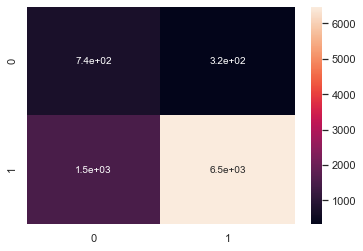

In [33]:
# Evaluating Results
#Making the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(data=cm, annot=True)

In [34]:
#Making the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.70      0.44      1058
           1       0.95      0.81      0.88      7985

    accuracy                           0.80      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.88      0.80      0.83      9043



In [35]:
# Formatting Final Results
user_identifier = df['custnum']
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted'] = y_pred
final_results = final_results[['custnum', 'y', 'predicted']].reset_index(drop=True)
final_results.head()

,custnum,y,predicted
0,5,1.0,1
1,11,1.0,1
2,20,1.0,1
3,21,1.0,1
4,26,1.0,1


In [36]:
# saving model as a pickle
pickle.dump(classifier,open("bank_marketing_ml_model.sav", "wb"))
pickle.dump(sc, open("scaler.sav", "wb"))

In [38]:
model = pickle.load(open("bank_marketing_ml_model.sav", "rb"))
scaled = pickle.load(open("scaler.sav", "rb"))

prediction = model.predict(scaled.transform([[2, 30, 0, 50000, 12, 8, 20, 19]]))
print(prediction)

[1]
